<a href="https://colab.research.google.com/github/SergeiVKalinin/MSE_Spring2024/blob/main/Module%202/12_NN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tutorial notebook for the Spring 2024 course
- Instructor Sergei V. Kalinin

# Simple NN regression

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Let's create a simple function and calculate both the ground truth answer and create some data.

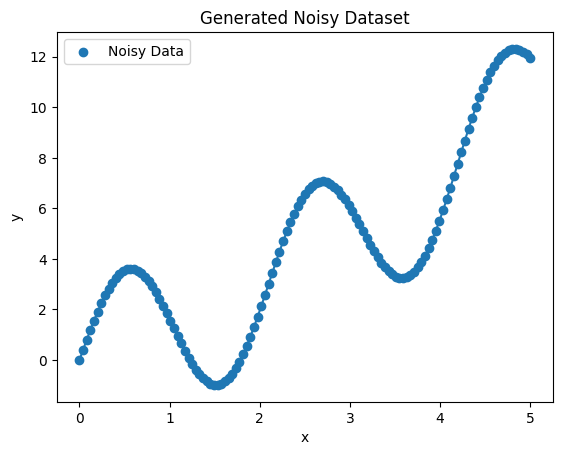

In [33]:
# Define the function parameters
a, b, c = 1, 0.2, 3

# Generate noisy data
x_data = np.linspace(0, 5, 125)
noise = np.random.normal(0, 0.005, size=x_data.shape)
y_truth = a * x_data + b * x_data**2 + c * np.sin(3*x_data)
y_data = y_truth + noise

# Plotting the noisy data
plt.scatter(x_data, y_data, label='Noisy Data')
plt.plot(x_data, y_truth)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Noisy Dataset')
plt.show()

Now, let's define a simple NN model

In [44]:
# Model definition
model = Sequential([
    Dense(32, activation='tanh', input_dim=1),
    Dense(32, activation='tanh'),
    Dense(128, activation='relu'),
    Dense(8, activation='linear'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

Reshape the data and train the model

In [45]:
# Reshape data for training
X_train = x_data.reshape(-1, 1)
Y_train = y_data.reshape(-1, 1)

# Train the model
model.fit(X_train, Y_train, epochs=1000, verbose=1)

Epoch 1/1000
4/4 [==============================] - 1s 6ms/step - loss: 26.2669
Epoch 2/1000
4/4 [==============================] - 0s 4ms/step - loss: 18.5110
Epoch 3/1000
4/4 [==============================] - 0s 4ms/step - loss: 12.7977
Epoch 4/1000
4/4 [==============================] - 0s 4ms/step - loss: 9.5238
Epoch 5/1000
4/4 [==============================] - 0s 4ms/step - loss: 8.8835
Epoch 6/1000
4/4 [==============================] - 0s 4ms/step - loss: 9.2965
Epoch 7/1000
4/4 [==============================] - 0s 4ms/step - loss: 9.2214
Epoch 8/1000
4/4 [==============================] - 0s 4ms/step - loss: 8.5673
Epoch 9/1000
4/4 [==============================] - 0s 5ms/step - loss: 8.2597
Epoch 10/1000
4/4 [==============================] - 0s 4ms/step - loss: 8.2269
Epoch 11/1000
4/4 [==============================] - 0s 5ms/step - loss: 8.1825
Epoch 12/1000
4/4 [==============================] - 0s 4ms/step - loss: 8.0304
Epoch 13/1000
4/4 [===========================

And see how this model behaves on the test data

10/10 [==============================] - 0s 3ms/step


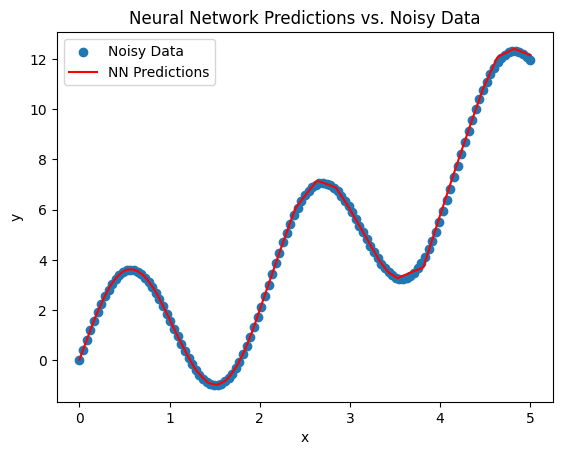

In [46]:
# Generate test data
x_test = np.linspace(0, 5, 300)
y_test = model.predict(x_test)

# Plotting the predictions against the noisy data
plt.scatter(x_data, y_truth, label='Noisy Data')
plt.plot(x_test, y_test, color='red', label='NN Predictions')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neural Network Predictions vs. Noisy Data')
plt.show()

In [31]:
model.*?

/usr/local/lib/python3.10/dist-packages/IPython/utils/wildcard.py:70: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  ns[key] = getattr(obj, key)
/usr/local/lib/python3.10/dist-packages/IPython/utils/wildcard.py:70: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  ns[key] = getattr(obj, key)


Experiment how the NN will behave if we change the numbe rof layers, neurons in the layers, and the activation fucntions.

# Ensemble NNs and uncertainties

Model  0
Model  1
Model  2
Model  3
Model  4
Model  5
Model  6
Model  7
Model  8
Model  9
7/7 [==============================] - 0s 2ms/step


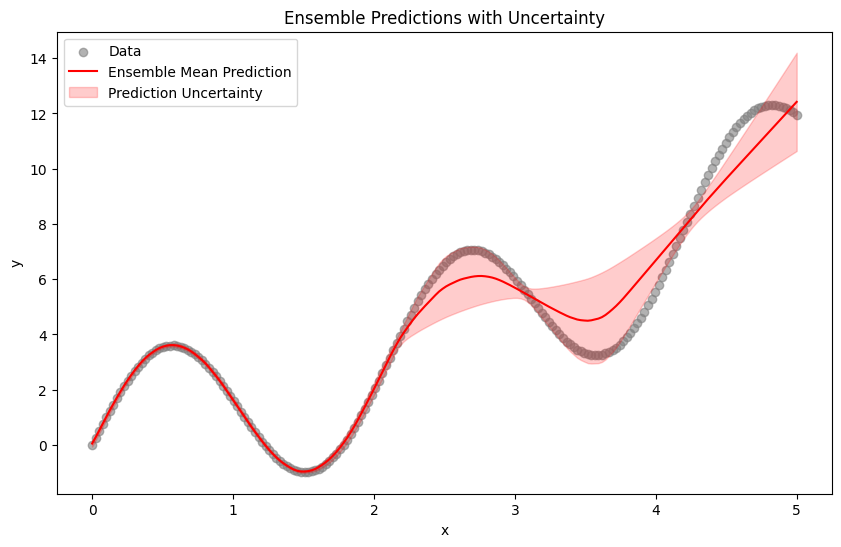

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Generate synthetic data
a, b, c = 1, 0.2, 3
x_data = np.linspace(0, 5, 200)
noise = np.random.normal(0, 0.005, size=x_data.shape)
y_data = a * x_data + b * x_data**2 + c * np.sin(3*x_data) + noise

# Function to create a model
def create_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(1,)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Create an ensemble of models
num_models = 10
models = [create_model() for _ in range(num_models)]

# Train each model in the ensemble
for i, model in enumerate(models):
    print("Model ", i)
    model.fit(x_data, y_data, epochs=500, verbose=0)

# Predict using the ensemble and calculate mean and uncertainty (standard deviation)
predictions = np.array([model.predict(x_data) for model in models])
mean_predictions = np.mean(predictions, axis=0)
uncertainty = np.std(predictions, axis=0)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='gray', alpha=0.6, label='Data')
plt.plot(x_data, mean_predictions, color='red', label='Ensemble Mean Prediction')
plt.fill_between(x_data, (mean_predictions - uncertainty).flatten(), (mean_predictions + uncertainty).flatten(), color='red', alpha=0.2, label='Prediction Uncertainty')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ensemble Predictions with Uncertainty')
plt.legend()
plt.show()


# NN Regression in 2D

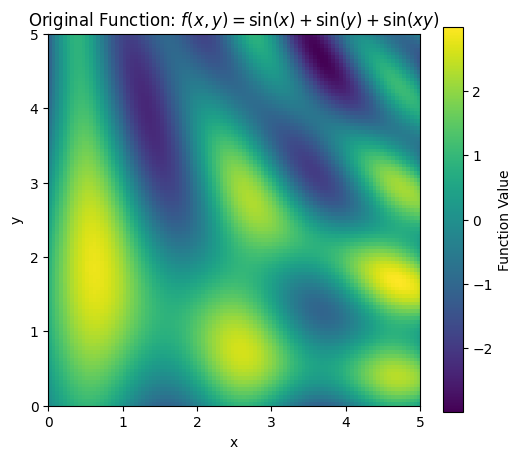

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid
x = np.linspace(0, 5, 100)
y = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(3*X) + np.sin(Y) + np.sin(X*Y)

# Visualize the original function
plt.figure(figsize=(6, 5))
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='viridis')
plt.colorbar(label='Function Value')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Original Function: $f(x, y) = \sin(x) + \sin(y) + \sin(xy)$')
plt.show()


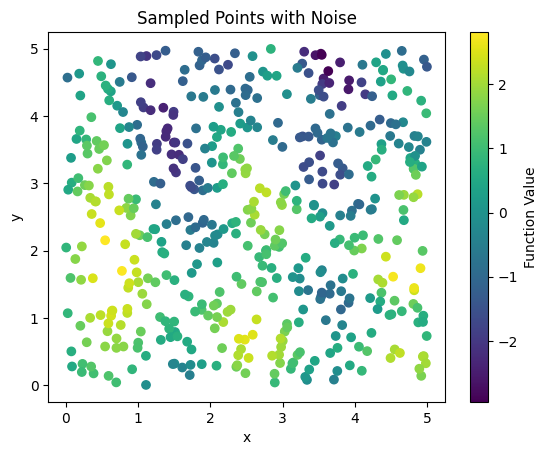

In [48]:
# Sampling points
num_samples = 500
x_sample = np.random.uniform(0, 5, num_samples)
y_sample = np.random.uniform(0, 5, num_samples)
z_sample = np.sin(3*x_sample) + np.sin(y_sample) + np.sin(x_sample*y_sample) + np.random.normal(0, 0.1, num_samples)

# Visualizing sampled points
plt.scatter(x_sample, y_sample, c=z_sample, cmap='viridis')
plt.colorbar(label='Function Value')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sampled Points with Noise')
plt.show()


In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(2,)),
    Dense(4, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Prepare data for training
train_data = np.vstack((x_sample, y_sample)).T
train_labels = z_sample

# Train the model
model.fit(train_data, train_labels, epochs=1000, verbose=0)

313/313 [==============================] - 1s 2ms/step


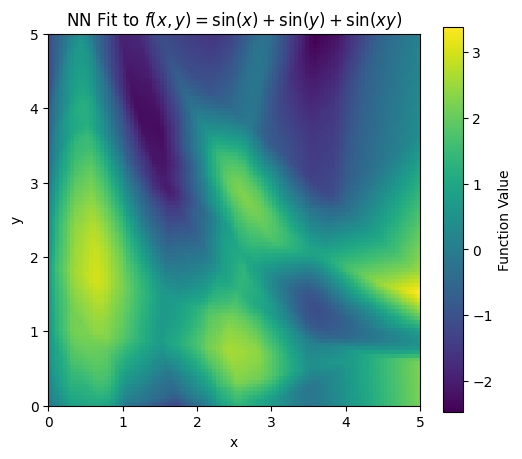

In [50]:
# Generate a prediction grid
x_test, y_test = np.meshgrid(np.linspace(0, 5, 100), np.linspace(0, 5, 100))
z_test = model.predict(np.hstack((x_test.reshape(-1, 1), y_test.reshape(-1, 1)))).reshape(100, 100)

# Visualizing NN fit results
plt.figure(figsize=(6, 5))
plt.imshow(z_test, extent=[0, 5, 0, 5], origin='lower', cmap='viridis')
plt.colorbar(label='Function Value')
plt.xlabel('x')
plt.ylabel('y')
plt.title('NN Fit to $f(x, y) = \sin(x) + \sin(y) + \sin(xy)$')
plt.show()


313/313 [==============================] - 1s 2ms/step


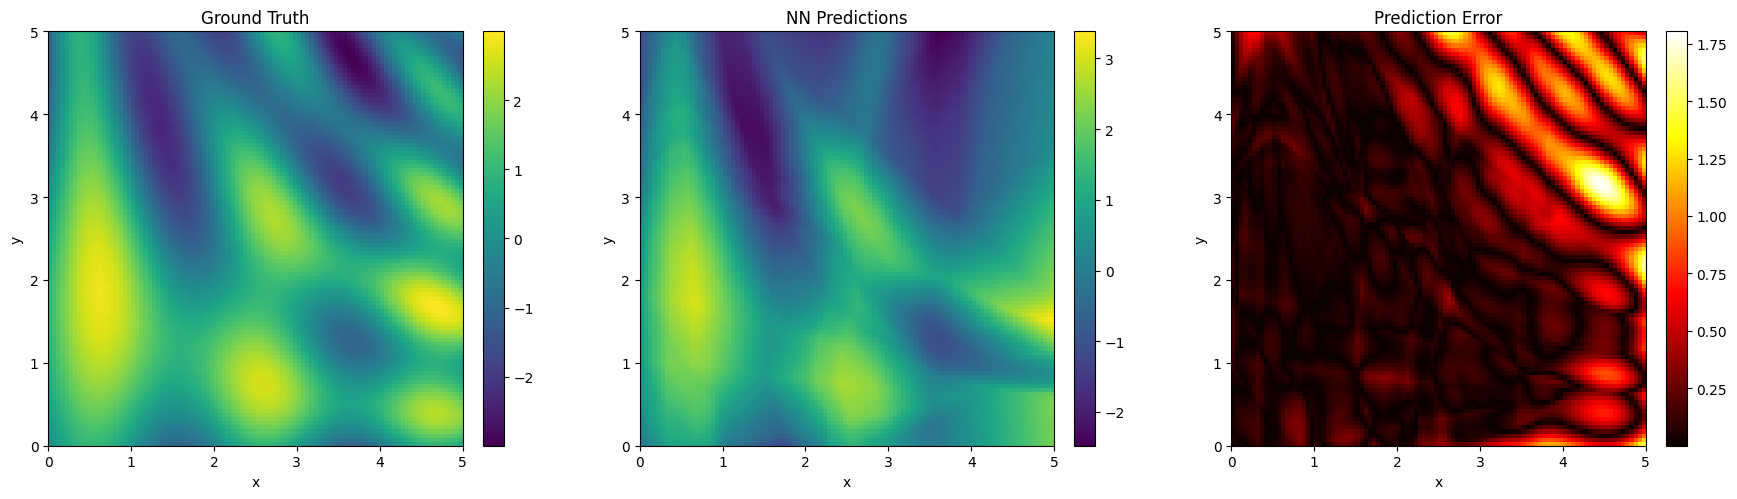

In [51]:
# Assuming the necessary imports, model definition, and training have been completed as described.

# Ground truth function evaluation on the grid
Z_ground_truth = np.sin(3*X) + np.sin(Y) + np.sin(X*Y)

# Predictions from the neural network
Z_predictions = model.predict(np.hstack((X.reshape(-1, 1), Y.reshape(-1, 1)))).reshape(100, 100)

# Calculating the error
Z_error = np.abs(Z_ground_truth - Z_predictions)

# Plotting ground truth, predictions, and error side by side
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Ground Truth
img0 = axs[0].imshow(Z_ground_truth, extent=[0, 5, 0, 5], origin='lower', cmap='viridis')
fig.colorbar(img0, ax=axs[0], fraction=0.046, pad=0.04)
axs[0].set_title('Ground Truth')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

# Predictions
img1 = axs[1].imshow(Z_predictions, extent=[0, 5, 0, 5], origin='lower', cmap='viridis')
fig.colorbar(img1, ax=axs[1], fraction=0.046, pad=0.04)
axs[1].set_title('NN Predictions')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')

# Error
img2 = axs[2].imshow(Z_error, extent=[0, 5, 0, 5], origin='lower', cmap='hot')
fig.colorbar(img2, ax=axs[2], fraction=0.046, pad=0.04)
axs[2].set_title('Prediction Error')
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')

plt.tight_layout()
plt.show()